In [25]:
#type: ignore

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import SGD
import random, sys

In [26]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val, y_val = X_train[40000:50000,:], y_train[40000:50000]
X_train, y_train = X_train[:40000,:], y_train[:40000]
print(X_train.shape)

(40000, 32, 32, 3)


In [27]:
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)
print(y_train[0]) #initial data
print(Y_train[0]) #one hot encoded data

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [28]:
# scale pixels
# convert from integers to floats
train_norm = X_train.astype('float32')
test_norm = X_val.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
X_train = train_norm
X_val = test_norm

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3))) #convolutional layer with 32 kernels, kernel size 3x3, sigmoid activation
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#ReLU is used for faster convergence and to avoid vanishing gradient
#He initializer: ensures probability distribution of starting weight values are not too large or too small - between (-sqrt(6/n), sqrt(6/n))
#padding = same to ensure the size of input and output layers are unified

model.add(Flatten()) #flatten from tensor into vector
model.add(Dense(128, activation='relu')) #fully connected layer with 128 nodes
model.add(Dense(10, activation='softmax')) #output layer with 10 nodes, softmax function for probability distribution output
model.compile(loss='categorical_crossentropy', optimizer = SGD(learning_rate=0.001, momentum=0.9) ,metrics=['accuracy']) #categorical cross entropy loss; mini-batch gradient descent for optimizing loss function

H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),batch_size=64, epochs=100, verbose=1)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.2716 - loss: 1.9749 - val_accuracy: 0.4326 - val_loss: 1.5492
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.4653 - loss: 1.4764 - val_accuracy: 0.5124 - val_loss: 1.3690
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.5330 - loss: 1.3064 - val_accuracy: 0.5662 - val_loss: 1.2319
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5860 - loss: 1.1723 - val_accuracy: 0.5906 - val_loss: 1.1632
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6241 - loss: 1.0556 - val_accuracy: 0.6216 - val_loss: 1.0713
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6534 - loss: 0.9842 - val_accuracy: 0.6419 - val_loss: 1.0290
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6805 - loss: 0.9055 - val_accuracy: 0.6497 - val_loss: 1.0161
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7046 - loss: 0

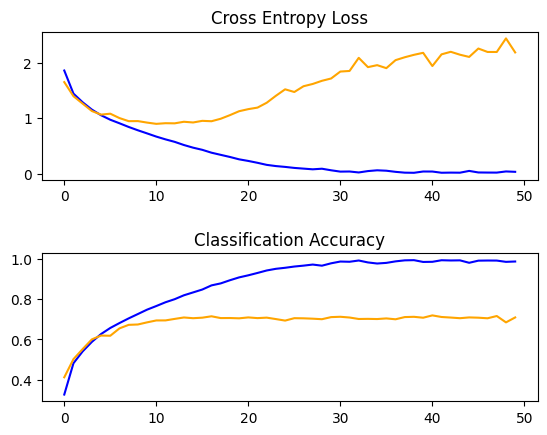

In [24]:
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(H.history['loss'], color='blue', label='train')
plt.plot(H.history['val_loss'], color='orange', label='test')


# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(H.history['accuracy'], color='blue', label='train')
plt.plot(H.history['val_accuracy'], color='orange', label='test')
plt.subplots_adjust(hspace=0.5)

# save plot to file
filename = sys.argv[0].split('/')[-1]
plt.savefig(filename + '_plot.png')
plt.show()

In [ ]:
_, acc = model.evaluate(X_test, Y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

In [ ]:
#predict image
sample_no = random.randrange(1, 10000)
plt.imshow(X_test[sample_no].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[sample_no].reshape(1,32,32,3))
print('Predicted value:', np.argmax(y_predict))